## Лабораторная работа №5. Анализ данных при помощи визуализации

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
from collections import Counter

## Часть 1

diamonds –набор  данных,  содержащий  сведения  о  53940  бриллиантах. Используется 10 переменных: price, carat, cut, color, clarity, x, y, z, depth и table (рисунок  1).  Описание  данных  можно  посмотреть,  перейдя  по  ссылке: https://www.kaggle.com/shivam2503/diamonds

## Загрузка данных

In [2]:
# Import Data
diamonds_data = pd.read_csv('diamonds.csv')
diamonds_data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Визуализация данных

Посчитаем глубину брилиантов (глубина % : высота бриллианта, измеренная от калетты до стола, деленная на средний диаметр его рундиста), а также сопоставим с цветом бриллианта, где D — лучший, а J — худший.

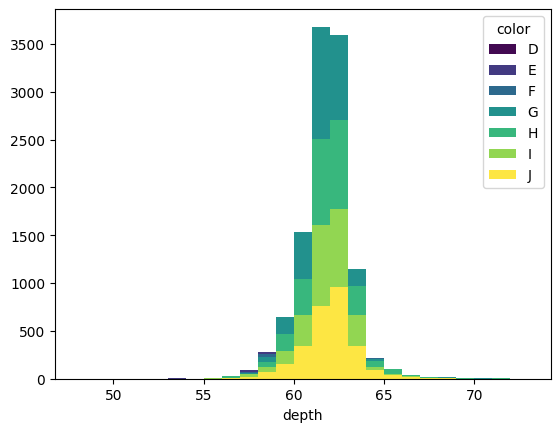

In [11]:
dat = diamonds_data['depth']

bs = np.arange(min(dat) + 5, max(dat) - 5)

j = diamonds_data.loc[diamonds_data['color'] == 'J']
i = diamonds_data.loc[diamonds_data['color'] == 'I']
h = diamonds_data.loc[diamonds_data['color'] == 'H']
g = diamonds_data.loc[diamonds_data['color'] == 'G']
e = diamonds_data.loc[diamonds_data['color'] == 'E']
f = diamonds_data.loc[diamonds_data['color'] == 'F']
d = diamonds_data.loc[diamonds_data['color'] == 'D']

plt.hist(d['depth'], bs, label = 'D', color = '#420951')
plt.hist(e['depth'], bs, label = 'E', color = '#423a81')
plt.hist(f['depth'], bs, label = 'F', color = '#2d698d')
plt.hist(g['depth'], bs, label = 'G', color = '#22918d')
plt.hist(h['depth'], bs, label = 'H', color = '#38b77d')
plt.hist(i['depth'], bs, label = 'I', color = '#92d652')
plt.hist(j['depth'], bs, label = 'J', color = '#fde643')


plt.legend(title = 'color')
plt.xlabel("depth")
plt.show()

Вывод: По составленной гистограмме видно, что наиболее часто встречающиеся значение глубины, находится на промежутке от 62 до 63 %.

Рассмотрим зависимость цены бриллианта в долларах от веса бриллианта в каратах, также сопоставим с мерой чистоты бриллианта (I1 (наихудшая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучшая)).

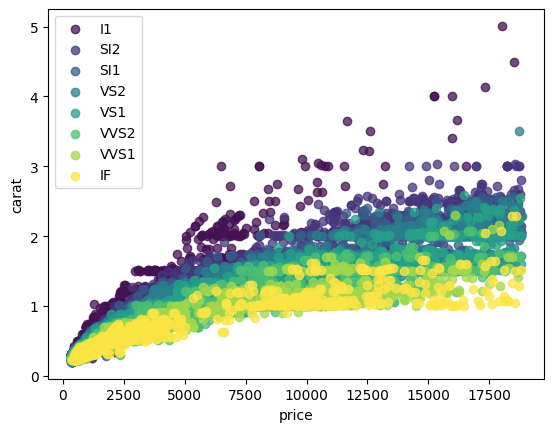

In [9]:
a = diamonds_data.loc[diamonds_data['clarity'] == 'SI2']
b = diamonds_data.loc[diamonds_data['clarity'] == 'SI1']
c = diamonds_data.loc[diamonds_data['clarity'] == 'VS1']
d = diamonds_data.loc[diamonds_data['clarity'] == 'VS2']
e = diamonds_data.loc[diamonds_data['clarity'] == 'VVS2']
f = diamonds_data.loc[diamonds_data['clarity'] == 'VVS1']
g = diamonds_data.loc[diamonds_data['clarity'] == 'I1']
h = diamonds_data.loc[diamonds_data['clarity'] == 'IF']

plt.scatter(
    x=g["price"],
    y=g["carat"],
    label = 'I1', color = '#441152', alpha=0.75)
plt.scatter(
    x=a["price"],
    y=a["carat"],
    label = 'SI2', color = '#46367c', alpha=0.75)
plt.scatter(
    x=b["price"],
    y=b["carat"],
    label = 'SI1', color = '#365d8b', alpha=0.75)
plt.scatter(
    x=d["price"],
    y=d["carat"],
    label = 'VS2', color = '#2a7f8d', alpha=0.75)
plt.scatter(
    x=c["price"],
    y=c["carat"],
    label = 'VS1', color = '#26a188', alpha=0.75)
plt.scatter(
    x=e["price"],
    y=e["carat"],
    label = 'VVS2', color = '#4ec072', alpha=0.75)
plt.scatter(
    x=f["price"],
    y=f["carat"],
    label = 'VVS1', color = '#a1d84d', alpha=0.75)
plt.scatter(
    x=h["price"],
    y=h["carat"],
    label = 'IF', color = '#fde545', alpha=0.75)

plt.xlabel("price")
plt.ylabel("carat")
plt.legend()

plt.show()

Вывод: На графике видна зависимость цены от веса бриллианта. Действительно, чем меньше цена изделия, тем меньше его вес в каратах. Однако можно заметить, что несмотря на повышение цены далее вес брилианта не сильно увеличивается, что говорит нам об определённых рамках существующего веса.
Также чем меньше вес брилианта тем больше шанс того, что у него будет наилучшая чистота.

Посчитаем наиболее часто встречающийся вес бриллианта в каратах, сопоставим с цветом бриллианта, где D — лучший, а J — худший.

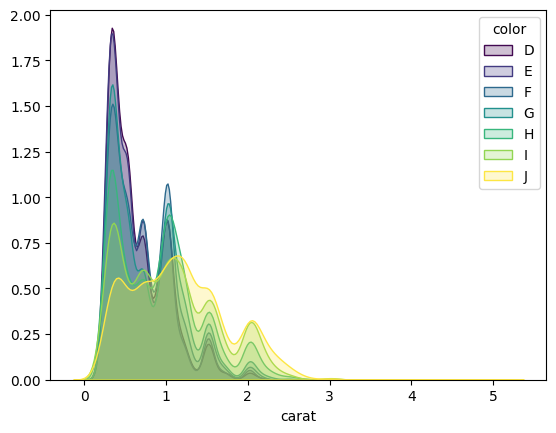

In [10]:
dat = diamonds_data['carat']

j = diamonds_data.loc[diamonds_data['color'] == 'J']
i = diamonds_data.loc[diamonds_data['color'] == 'I']
h = diamonds_data.loc[diamonds_data['color'] == 'H']
g = diamonds_data.loc[diamonds_data['color'] == 'G']
e = diamonds_data.loc[diamonds_data['color'] == 'E']
f = diamonds_data.loc[diamonds_data['color'] == 'F']
d = diamonds_data.loc[diamonds_data['color'] == 'D']

sns.kdeplot(d['carat'], label = 'D', color = '#420951', fill=True)
sns.kdeplot(e['carat'], label = 'E', color = '#423a81', fill=True)
sns.kdeplot(f['carat'], label = 'F', color = '#2d698d', fill=True)
sns.kdeplot(g['carat'], label = 'G', color = '#22918d', fill=True)
sns.kdeplot(h['carat'], label = 'H', color = '#38b77d', fill=True)
sns.kdeplot(i['carat'], label = 'I', color = '#92d652', fill=True)
sns.kdeplot(j['carat'], label = 'J', color = '#fde643', fill=True)

plt.legend(title = 'color')
plt.ylabel("")
plt.show()

Вывод: По составленной диграмме видно, что наиболее часто встречающийся вес брилианта, находится на промежутке от 0 до 1, также на этом промежутке чаще встречаются брилианты с лучшим цветом. 

Посчитаем наименее часто встречающийся вес бриллианта в каратах, сопоставим с мерой чистоты бриллианта (I1 (наихудшая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучшая))

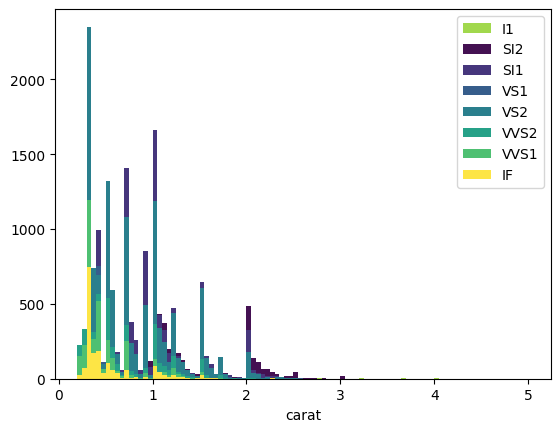

In [5]:
data = diamonds_data['carat']
bs = np.arange(min(data), max(data), 0.05)

g = diamonds_data.loc[diamonds_data['clarity'] == 'I1']
a = diamonds_data.loc[diamonds_data['clarity'] == 'SI2']
b = diamonds_data.loc[diamonds_data['clarity'] == 'SI1']
c = diamonds_data.loc[diamonds_data['clarity'] == 'VS1']
d = diamonds_data.loc[diamonds_data['clarity'] == 'VS2']
e = diamonds_data.loc[diamonds_data['clarity'] == 'VVS2']
f = diamonds_data.loc[diamonds_data['clarity'] == 'VVS1']
h = diamonds_data.loc[diamonds_data['clarity'] == 'IF']


plt.hist(g['carat'], bs, label = 'I1', color = '#a1d84d')
plt.hist(a['carat'], bs, label = 'SI2', color = '#441152')
plt.hist(b['carat'], bs, label = 'SI1', color = '#46367c')
plt.hist(c['carat'], bs, label = 'VS1', color = '#365d8b')
plt.hist(d['carat'], bs, label = 'VS2', color = '#2a7f8d')
plt.hist(e['carat'], bs, label = 'VVS2', color = '#26a188')
plt.hist(f['carat'], bs, label = 'VVS1', color = '#4ec072')
plt.hist(h['carat'], bs, label = 'IF', color = '#fde545')

plt.xlabel("carat")
plt.legend()

plt.show()

Вывод: По составленной гистограмме видно, что наименее часто встречающийся вес брилианта, находится на промежутке от 2 и далее, на данном промежутке плохая мера чистоты брилианта.